# Flight Fare Prediction

### Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Gathering the data

In [2]:
Data_train = pd.read_excel('Data_Train.xlsx')

In [3]:
# To display all the columns in the dataset:
pd.set_option('display.max_columns',None)

In [4]:
Data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
Data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
Data_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
33h 45m      1
32h 55m      1
36h 25m      1
27h 30m      1
5m           1
Name: Duration, Length: 368, dtype: int64

### Checking for Nan values and dropping it

In [8]:
Data_train.shape

(10683, 11)

In [9]:
Data_train.dropna(inplace=True)

In [10]:
Data_train.shape

(10682, 11)

In [11]:
Data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis (EDA)

In [12]:
Data_train['Journey_date'] = pd.to_datetime(Data_train['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [13]:
Data_train['Journey_month'] = pd.to_datetime(Data_train['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [14]:
Data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#Dropping the Date_of_Journey :
Data_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [16]:
type(Data_train['Dep_Time'][0])

str

In [17]:
#Handling the departure time column:
#Creating a separate column for Hour:
Data_train['Dep_hour'] = pd.to_datetime(Data_train['Dep_Time']).dt.hour

#Creating a separate column for Minutes:
Data_train['Dep_minutes'] = pd.to_datetime(Data_train['Dep_Time']).dt.minute

#Dropping the Dep_Time column :
Data_train.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
Data_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
#Handilne the Arrival time column:
#Creating the Arrival hour column:
Data_train['Arrival_Hour'] = pd.to_datetime(Data_train['Arrival_Time']).dt.hour

#Creating the Arrival minutes column:
Data_train['Arrival_minute'] =  pd.to_datetime(Data_train['Arrival_Time']).dt.minute

#Dropping the Arrival_Time column:
Data_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
Data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
#Handling the Duration:
#Creating a list of duration values:
duration = list(Data_train['Duration'])

#Handling values that contain either hour or minutes: 
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h '+ duration[i]

#Creating seperate lists for Duration hours and Duration minutes:
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_minutes.append(int(duration[i].split('m')[0].split()[-1]))

In [22]:
#Adding the Created lists to the DataFrame:
Data_train['Duration_hours'] = duration_hours
Data_train['Duration_minutes'] = duration_minutes

In [23]:
#Dropping the Duration column:
Data_train.drop(['Duration'],axis=1,inplace=True)

In [24]:
Data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling categorical data:

Ways to handle categorical data
1. Nominal data -> Data which is not in any order -> One hot encoding
2. Ordinal data -> Data which is in order -> Label Encoder

In [25]:
#Airline Feature: 
#Comes under Nominal data:
Data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

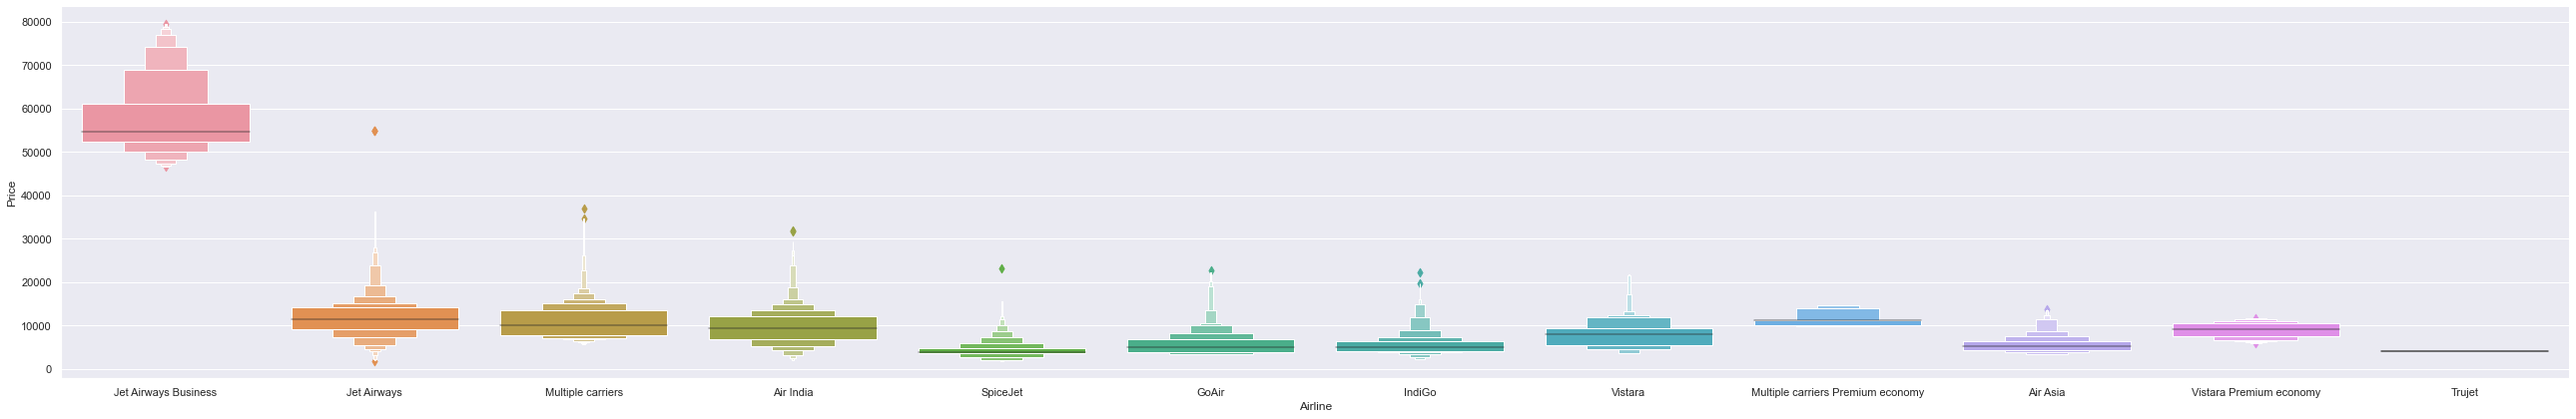

In [26]:
#Visualzing the Airline feature with respect to the Price:
sns.catplot(y='Price',x='Airline',data=Data_train.sort_values('Price',ascending=False),
            kind='boxen',height=6,aspect=6)
plt.show()

In [27]:
#Performing one hot encoding in Airline feature:
Airline = Data_train[['Airline']]

Airline = pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
# Handling the Source feature:
Data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

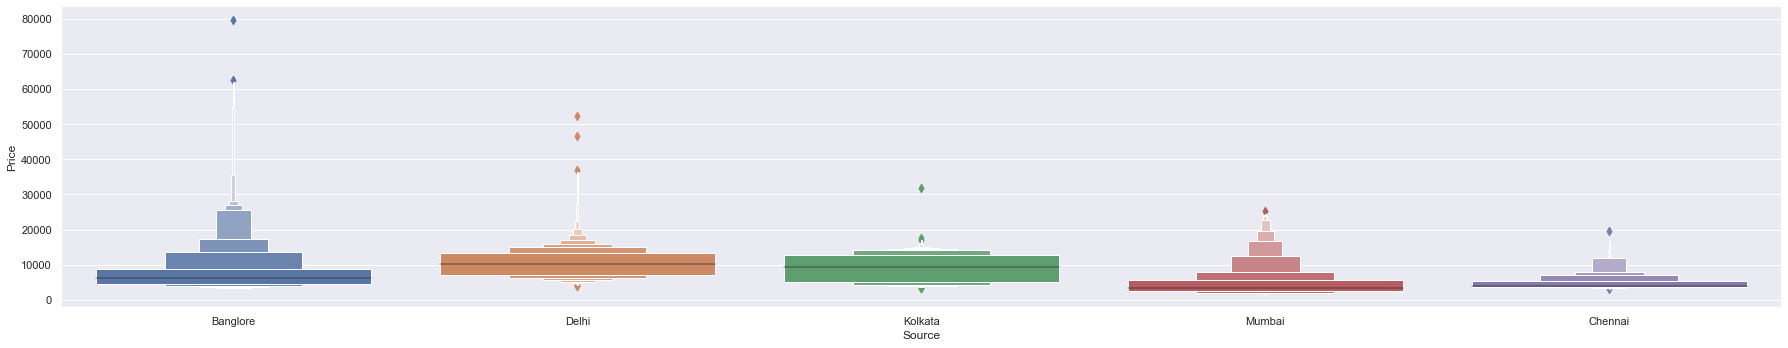

In [29]:
# Visualizing  the source feature wrt to Price:
sns.catplot(y='Price',x='Source',data=Data_train.sort_values
            ('Price',ascending=False),height=5,aspect=5,kind='boxen')
plt.show()

In [30]:
#Performing one hot encoding in Source:
#Source is also nominal data value
Source = Data_train[['Source']]

Source = pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
#Handiling the destination feature:
Data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

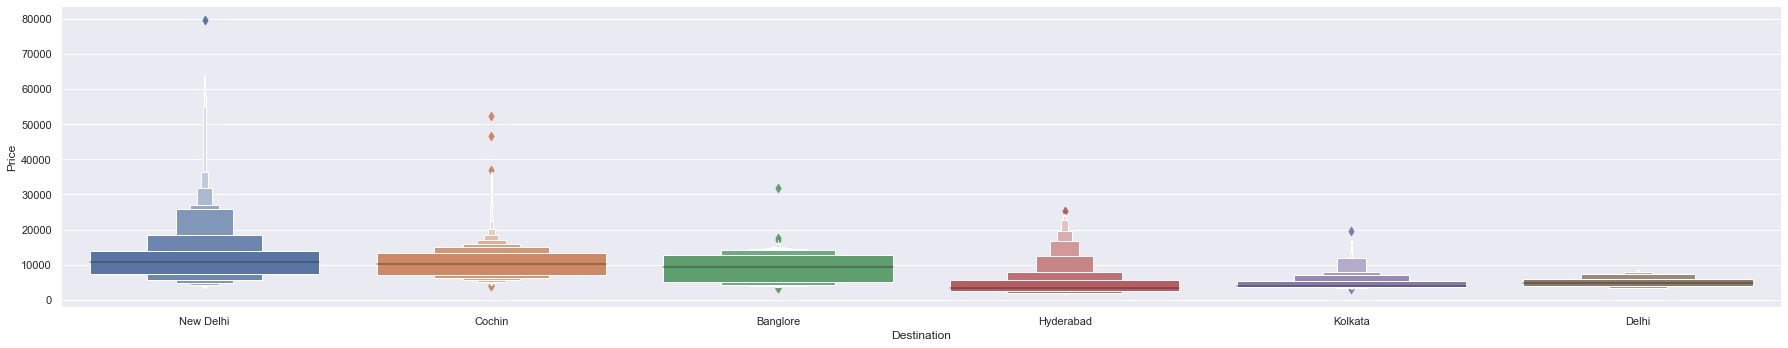

In [32]:
#Visualizing the Destination wrt to Price:
sns.catplot(y='Price',x='Destination',data=Data_train.sort_values('Price',ascending=False)
           ,aspect=5,height=5,kind='boxen')
plt.show()

In [33]:
#Performing one hot encoding in Destination:
Destination = Data_train[['Destination']]

Destination = pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
# Handling the Route and Additional info :
print(Data_train['Additional_Info'].value_counts())
print('\n',Data_train['Route'])

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

 0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object


In [35]:
#Dropping Additional_Info and Route:
Data_train.drop(['Additional_Info','Route'],axis=1,inplace=True)
Data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
# Handling Total_Stops feature: 
# Non-stop values decreases , Multiple stop increases - > Price increases
Data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
#Applying Label Encoder to the Total_Stops - Ordinal Data:
Data_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [38]:
Data_train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [39]:
# Concatenating Airline , Source ,Destination to the Data_train:
Train_data = pd.concat([Data_train,Airline,Source,Destination],axis=1)

In [40]:
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
Train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [42]:
Train_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Test Dataset

In [43]:
#Repeating the same steps to the Test Dataset
Data_test = pd.read_excel('Test_set.xlsx')

In [44]:
Data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
#Checking for null values:
Data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
Data_test['Journey_date'] = pd.to_datetime(Data_test['Date_of_Journey'],format='%d/%m/%Y').dt.day
Data_test['Journey_month'] = pd.to_datetime(Data_test['Date_of_Journey'],
                                            format='%d/%m/%Y').dt.month

In [47]:
Data_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [48]:
Data_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [49]:
Data_test['Departure_hour'] = pd.to_datetime(Data_test['Dep_Time']).dt.hour
Data_test['Departure_minute'] = pd.to_datetime(Data_test['Dep_Time']).dt.minute

In [50]:
Data_test.drop(['Dep_Time'],axis=1,inplace=True)

In [51]:
Data_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [52]:
Data_test['Arrival_hour'] = pd.to_datetime(Data_test['Arrival_Time']).dt.hour
Data_test['Arrival_minute'] = pd.to_datetime(Data_test['Arrival_Time']).dt.minute

In [53]:
Data_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [54]:
#Handling Duration:
Test_duration = list(Data_test['Duration'])

for i in range(len(Test_duration)):
    if len(Test_duration[i]) != 2:
        if 'h' in Test_duration[i]:
            Test_duration[i] = Test_duration[i].strip() + ' 0m'
        else:
            Test_duration[i] = '0h '+Test_duration[i]

Test_duration_hours = []
Test_duration_minutes = []
for i in range(len(Test_duration)):
    Test_duration_hours.append(Test_duration[i].split('h')[0])
    Test_duration_minutes.append(Test_duration[i].split('m')[0].split()[-1])

In [55]:
Data_test['Duration_hours'] = Test_duration_hours
Data_test['Duration_minutes'] = Test_duration_minutes

In [56]:
Data_test.drop(['Duration'],axis=1,inplace=True)

In [57]:
Data_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,4h
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


### Handling categorical values in test data

In [58]:
#Handline the Airline feature:
Data_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [59]:
Airline_test = Data_test[['Airline']]

Airline_test = pd.get_dummies(Airline_test,drop_first=True)

Airline_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [60]:
#Handling the source feature:
Data_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [61]:
Source_test = Data_test[['Source']]

Source_test = pd.get_dummies(Source_test,drop_first=True)

Source_test.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [62]:
#Handling the Destination:
Data_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [63]:
Destination_test = Data_test[['Destination']]

Destination_test = pd.get_dummies(Destination_test,drop_first=True)

Destination_test.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [64]:
Data_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [65]:
# Handling Total stops:
Data_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [66]:
Test_data = pd.concat([Data_test,Airline_test,Source_test,Destination_test],axis=1)

In [67]:
Test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,4h,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
Test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [69]:
Test_data.shape

(2671, 28)

In [70]:
Train_data.shape

(10682, 30)

### Feature Selection

In [71]:
Train_data.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_Hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [72]:
X = Train_data.loc[:,['Total_Stops', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_Hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
Y = Train_data.loc[:,'Price']
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

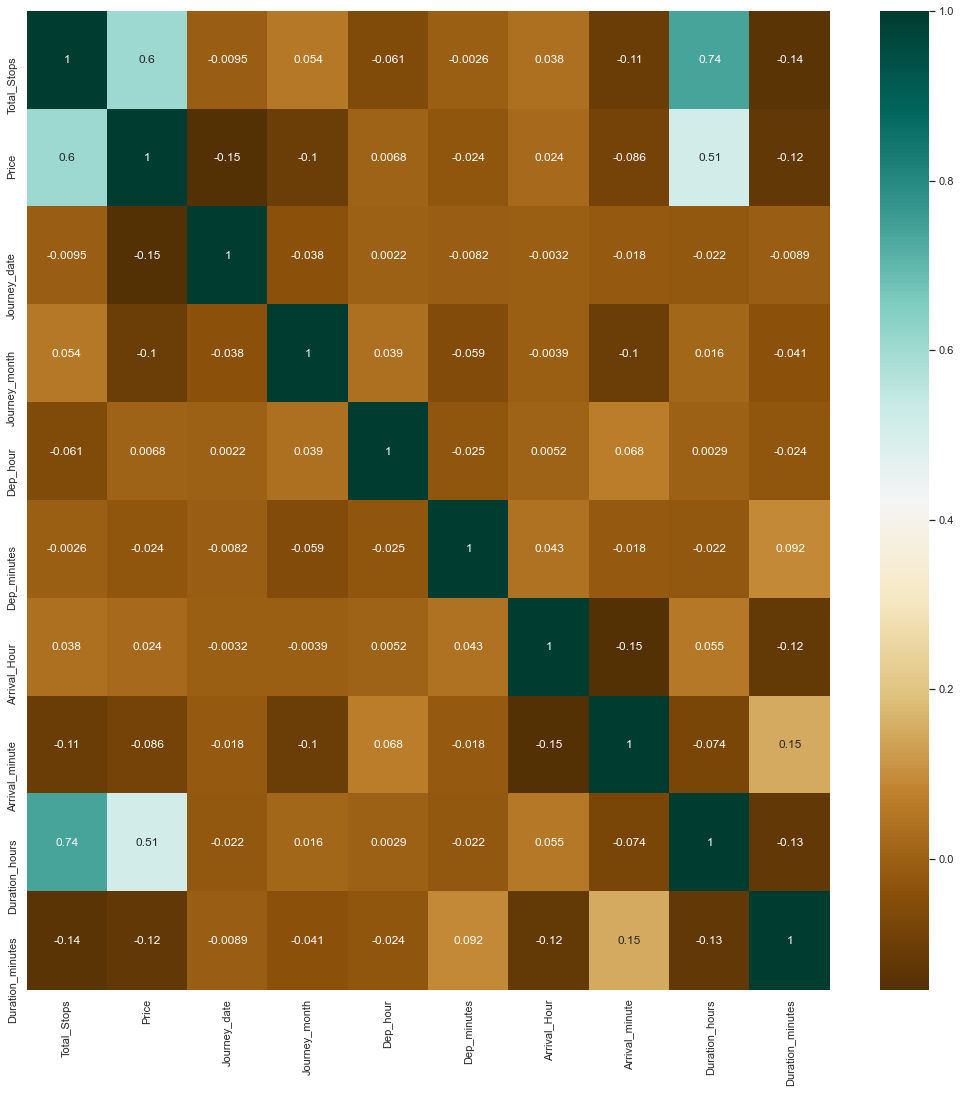

In [74]:
# Viewing the correlation:
plt.figure(figsize=(18,18))
sns.heatmap(Data_train.corr(),annot=True,cmap='BrBG')
plt.show()

### Importing Features using Extra Tree regressor

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [76]:
print(selection.feature_importances_)

[2.37566135e-01 1.43277997e-01 5.40478511e-02 2.47845987e-02
 2.10836410e-02 2.86638896e-02 1.86925639e-02 1.02796723e-01
 1.76492337e-02 9.95569120e-03 2.02511696e-03 1.89381902e-02
 1.43956046e-01 6.75327048e-02 1.76528975e-02 8.81645198e-04
 3.24456145e-03 1.02686834e-04 4.81385379e-03 8.13205033e-05
 4.55188483e-04 1.04911887e-02 3.20597377e-03 6.73750647e-03
 1.31526419e-02 1.55411304e-02 7.22565507e-03 5.07477083e-04
 2.49358904e-02]


In [77]:
type(selection.feature_importances_)

numpy.ndarray

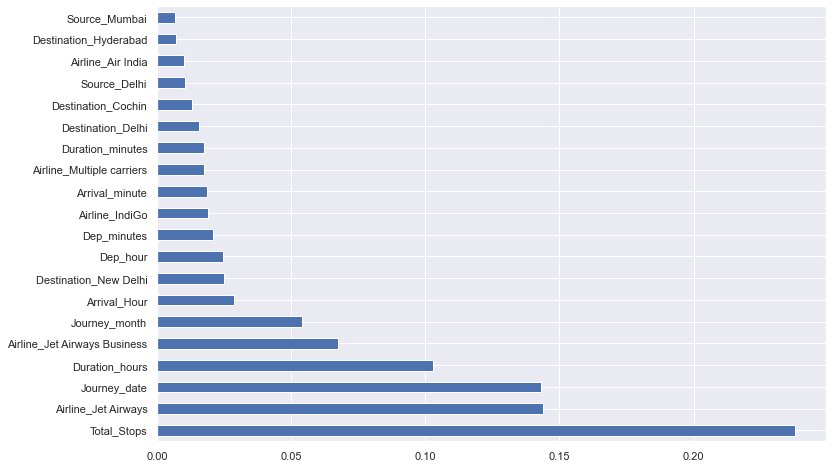

In [78]:
plt.figure(figsize=(12,8))
feature_importance = pd.Series(selection.feature_importances_,index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

### Train, Test split and Model Creation 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [81]:
from sklearn.ensemble  import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [82]:
Y_pred = model.predict(X_test)

In [83]:
model.score(X_train,Y_train)

0.9541254748822545

In [84]:
model.score(X_test,Y_test)

0.8213140137261911

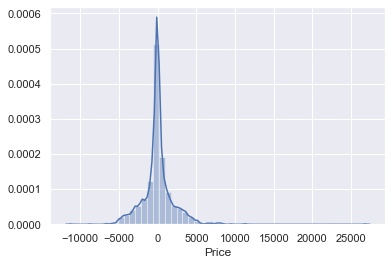

In [85]:
sns.distplot(Y_test-Y_pred)
plt.show()

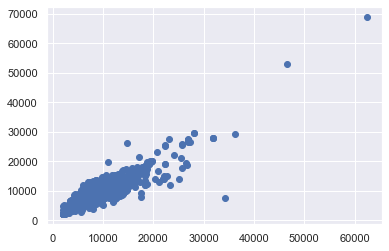

In [86]:
plt.scatter(Y_test,Y_pred)
plt.show()

In [87]:
from sklearn import metrics 

In [88]:
print('MAE :',metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE :',metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE : 1243.8874540819108
MSE : 4062120.838551996
RMSE : 2015.4703765007303


In [89]:
metrics.r2_score(Y_test,Y_pred)

0.8213140137261911

### Hyper parameter tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
# Number of tress in the Random Forest:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to be considered:
Max_features = ['auto','sqrt']
# Maximum depth in the trees:
Max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
# Minimum number of samples required to split a node:
Min_sample_split = [2,5,10,15,100]
# Minimum number of samples required at the leaf node:
Min_sample_leaf = [1,2,5,10]

In [92]:
#Random grid:
random_grid = {'n_estimators':n_estimators,
              'max_features':Max_features,
              'max_depth':Max_depth,
              'min_samples_leaf':Min_sample_leaf,
              'min_samples_split':Min_sample_split}

In [93]:
rf_random = RandomizedSearchCV(estimator=model,param_distributions=random_grid,
                   scoring='neg_mean_squared_error',n_iter=10,cv=5,
                   verbose=2,random_state=10,n_jobs=1)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.5s


In [ ]:
rf_random.best_params_

In [ ]:
prediction = model.predict(X_test)

In [ ]:
sns.distplot(Y_test-prediction)
plt.show()

In [ ]:
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :',metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

### Save the model to reuse it again

In [ ]:
import pickle 

file = open('flight_rf.pkl','wb')

pickle.dump(rf_random,file)

In [ ]:
models = open('flight_rf.pkl','rb')
forest = pickle.load(models)

In [ ]:
my_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(Y_test,my_prediction)